# Minimal tracking examples using NumPy and PyTorch

In [1]:
import matplotlib.pyplot as plt

## NumPy

In [2]:
import numpy as np

In [3]:
# Create single particle
from bmadx import Particle, M_ELECTRON

coords = np.ones(6)*1e-3
s = 0.0
p0c = 4e7
p = Particle(*coords, s, p0c, M_ELECTRON)
# Particle is a named tuple with: cannonical coords (x, px, y, py, z, pz), s, p0c, mc2:
p

Particle(x=0.001, px=0.001, y=0.001, py=0.001, z=0.001, pz=0.001, s=0.0, p0c=40000000.0, mc2=510998.94999999995)

In [4]:
# Access elements by name using dot notation:
p.x

0.001

In [5]:
# Create particle beam
n_particles = 1_000_000 # number of particles in beam
coords = np.random.multivariate_normal(mean = np.zeros(6),
                                       cov = 1e-6*np.identity(6),
                                       size = n_particles
                                      )
beam = Particle(*coords.T, s, p0c, M_ELECTRON)
beam

Particle(x=array([-0.00061399,  0.00102235,  0.00083702, ...,  0.00029746,
        0.00211336,  0.00103384]), px=array([ 4.46292684e-05, -1.28016346e-04, -4.73141368e-04, ...,
        6.69670782e-04,  4.31180419e-04, -7.82403745e-05]), y=array([-0.0005588 , -0.00120673,  0.00037897, ..., -0.00045599,
       -0.00106374, -0.00110806]), py=array([ 4.10663375e-04, -9.25252723e-05, -1.51422753e-04, ...,
        1.33047560e-03,  1.09957452e-03,  8.19841690e-04]), z=array([-9.61885328e-04, -1.04599213e-03, -6.80929725e-04, ...,
       -3.81225766e-04, -3.76520266e-04, -5.13104946e-05]), pz=array([ 0.0004402 , -0.00117363, -0.00013023, ..., -0.00033949,
       -0.00013019, -0.00116607]), s=0.0, p0c=40000000.0, mc2=510998.94999999995)

Text(0, 0.5, '$y$ (mm)')

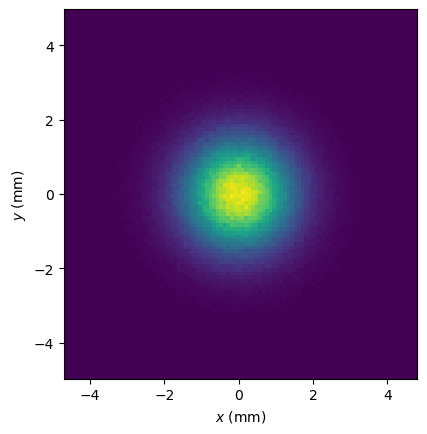

In [6]:
# plot beam x,y histogram:
fig, ax = plt.subplots()
ax.hist2d(beam.x*1e3, beam.y*1e3, bins=(100,100))
ax.set_aspect('equal')
ax.set_xlabel(r'$x$ (mm)')
ax.set_ylabel(r'$y$ (mm)')

In [7]:
# Create a drift element: 
from bmadx import Drift

d = Drift(L=1.0)
# Drift is a named tuple with: L (drift length): 
d

Drift(L=1.0)

In [8]:
# Track though drift
from bmadx import track_element

track_element(beam, d) # returns outgoing particle beam

Particle(x=array([-0.00056938,  0.00089419,  0.00036381, ...,  0.00096736,
        0.0025446 ,  0.0009555 ]), px=array([ 4.46292684e-05, -1.28016346e-04, -4.73141368e-04, ...,
        6.69670782e-04,  4.31180419e-04, -7.82403745e-05]), y=array([-1.48317768e-04, -1.29936752e-03,  2.27523607e-04, ...,
        8.74935329e-04,  3.59755186e-05, -2.87258725e-04]), py=array([ 4.10663375e-04, -9.25252723e-05, -1.51422753e-04, ...,
        1.33047560e-03,  1.09957452e-03,  8.19841690e-04]), z=array([-9.61898789e-04, -1.04619647e-03, -6.81074407e-04, ...,
       -3.82391257e-04, -3.77239187e-04, -5.18410222e-05]), pz=array([ 0.0004402 , -0.00117363, -0.00013023, ..., -0.00033949,
       -0.00013019, -0.00116607]), s=1.0, p0c=40000000.0, mc2=510998.94999999995)

In [9]:
# Create a quarupole element:
from bmadx import Quadrupole

q_focus = Quadrupole(L=0.1, K1=10.0)
# Quadrupole is a named tuple with: L, K1, X_OFFSET=0, Y_OFFSET=0, TILT=0
q_focus

Quadrupole(L=0.1, K1=10.0, NUM_STEPS=1, X_OFFSET=0, Y_OFFSET=0, TILT=0)

In [10]:
# Track though quadrupole
track_element(beam, q_focus)

Particle(x=array([-0.00057917,  0.000959  ,  0.00074897, ...,  0.00034859,
        0.00205096,  0.00097481]), px=array([ 0.00064623, -0.00112704, -0.00127281, ...,  0.00034393,
       -0.00166851, -0.00109103]), y=array([-0.00054523, -0.00127707,  0.00038268, ..., -0.00034367,
       -0.00100557, -0.00108053]), py=array([-1.36797324e-04, -1.32416617e-03,  2.26256492e-04, ...,
        9.33944390e-04,  7.34570291e-05, -2.65414591e-04]), z=array([-9.61887888e-04, -1.04606661e-03, -6.80973946e-04, ...,
       -3.81308559e-04, -3.76581588e-04, -5.13599638e-05]), pz=array([ 0.0004402 , -0.00117363, -0.00013023, ..., -0.00033949,
       -0.00013019, -0.00116607]), s=0.1, p0c=40000000.0, mc2=510998.94999999995)

In [11]:
# Track through a lattice
from bmadx import track_lattice

q_defocus =  Quadrupole(L=0.1, K1=-10.0)
lat = [d, q_focus, d, q_defocus, d, q_focus, d] # lattice is a list of elements
track_lattice(beam, lat) # returns outgoing particle beam

Particle(x=array([ 0.00070594, -0.00122901, -0.0013661 , ...,  0.00033389,
       -0.00185849, -0.00119282]), px=array([-0.00015044,  0.00031234,  0.00065108, ..., -0.00067262,
       -0.00011038,  0.00026052]), y=array([ 0.0007153 , -0.00126763, -0.00011967, ...,  0.00344761,
        0.00227693,  0.00143635]), py=array([ 4.01756532e-04,  5.37465275e-05, -1.66381165e-04, ...,
        1.15703506e-03,  1.02958390e-03,  8.00438668e-04]), z=array([-9.62269654e-04, -1.05032080e-03, -6.82762613e-04, ...,
       -3.87084248e-04, -3.82837905e-04, -5.43657240e-05]), pz=array([ 0.0004402 , -0.00117363, -0.00013023, ..., -0.00033949,
       -0.00013019, -0.00116607]), s=4.300000000000001, p0c=40000000.0, mc2=510998.94999999995)

In [12]:
# Track through a lattice saving Particle tuples after each element
from bmadx import track_lattice_save_stats

all_p = track_lattice_save_stats(beam, lat) 
# returns a list of Particles: all_p[0] is the incoming Particle and 
# all_p[i] is the Particle after the 'i'th element. 

Text(0, 0.5, 'beam size (mm)')

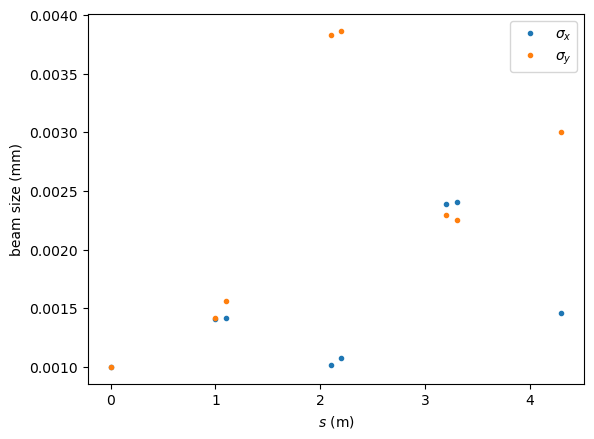

In [14]:
# Plot x and y beamsize though lattice:

plt.plot(all_p['s'], all_p['sigma_x'], '.', label = r'$\sigma_x$')
plt.plot(all_p['s'], all_p['sigma_y'], '.', label = r'$\sigma_y$')
plt.legend()
plt.xlabel(r'$s$ (m)')
plt.ylabel(r'beam size (mm)')

In [ ]:
# one can slice every element in the lattice for plotting purposes:
all_p_sliced = track_sliced_lattice(beam, lat, n_slices=10)

# Plot x and y beamsize though lattice:
beamsize_x_sliced = np.array([np.std(particle.x) for particle in all_p_sliced])
beamsize_y_sliced = np.array([np.std(particle.y) for particle in all_p_sliced])
s_sliced = np.array([particle.s for particle in all_p_sliced])
plt.plot(s, beamsize_x*1e3, '.', color='C0', label = r'$\sigma_x$ slicing off')
plt.plot(s, beamsize_y*1e3, '.', color='C1', label = r'$\sigma_y$ slicing off')
plt.plot(s_sliced, beamsize_x_sliced*1e3, color='C0', linestyle='--', label = r'$\sigma_x$ slicing on')
plt.plot(s_sliced, beamsize_y_sliced*1e3, color='C1', linestyle='--', label = r'$\sigma_y$ slicing on')
plt.legend()
plt.xlabel(r'$s$ (m)')
plt.ylabel(r'beam size (mm)')

In [ ]:
from bmadx import track_lattice_save_stats
stats = track_lattice_save_stats(beam, lat, n_slices=10)
plt.plot(stats['s'], stats['sigma_x'], label=r'$\sigma_x$')
plt.plot(stats['s'], stats['sigma_y'], label=r'$\sigma_y$')
plt.legend()

## PyTorch

In [ ]:
import torch

In [ ]:
# Create particle beam
tcoords = torch.tensor(coords)
tbeam = Particle(*tcoords.T,
                 torch.tensor(s),
                 torch.tensor(p0c),
                 torch.tensor(M_ELECTRON))
tbeam

In [ ]:
# Tracking though element takes incoming particle coordinate
# type (i.e., torch tensor in this case) for the tracking regarldless
# the element parameter types.
q = Quadrupole(L=0.1, K1=10)
track_element(tbeam, q)

In [ ]:
# we can use PyTorch autograd to calculate derivatives
from torch.autograd.functional import jacobian

# calculate jacobian around 0 though quadrupole:
# define tracking as function of 6d coordinates:
f_quadrupole = lambda coord: track_element(Particle(*coord,
                                                    s = torch.tensor(0.0),
                                                    p0c = torch.tensor(4e7),
                                                    mc2 = torch.tensor(M_ELECTRON)), 
                                           q)

# Incoming particle coords
tvec = torch.zeros(6, requires_grad=True)

# Jacobian using pytorch autograd:
J = jacobian(f_quadrupole, tvec)
J = torch.vstack(J)
J

In [ ]:
# calculate gradient of beamsize with respect to quadrupole strengths:

beam_in = tbeam # incoming beam

def beamsize(quad_strengths):
    """Function of beamsize with respect to quad strengths"""
    # create lattice of len(quad_strengths) quadrupoles separated by drifts:
    L_d = 0.9 # drift length
    L_q = 0.1 # quad length
    half_drift = Drift(L=L_d/2) # half drift
    lattice = [] # initialize lattice
    # create lattice:
    for k1 in quad_strengths:
        lattice.append( half_drift )
        lattice.append( Quadrupole(L=L_q, K1=k1) )
        lattice.append( half_drift )
        
    beam_out = track_lattice(beam_in, lattice)
    return beam_out.x.std()

# calculate gradient:

gradient = jacobian(beamsize, torch.zeros(5))
gradient

In [ ]:
# calculate hessian:
from torch.autograd.functional import hessian

hessian = hessian(beamsize, torch.zeros(5))
#hessian = torch.vstack(hessian)
hessian

In [ ]:
# plot hessian
plt.imshow(hessian.numpy())
plt.colorbar()